In [2]:
import wget

In [3]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
wget.download(url, 'laptops.csv')

100% [............................................................................] 298573 / 298573

'laptops.csv'

In [51]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("laptops.csv")

In [54]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [5]:
list(df.dtypes[df.dtypes == 'object'].index)

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [55]:
df = df[["ram", "storage", "screen", "final_price"]]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Question 1

In [23]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

In [9]:
df.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

### Question 3

Prepare and split the dataset

In [11]:
n = len(df)

In [12]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)

n_train = n - n_val - n_test

In [13]:
n, n_val + n_test + n_train

(2160, 2160)

In [18]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [56]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [57]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [58]:
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

In [59]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

#### Training

In [79]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [95]:
X_train = df_train.fillna(0).values

In [81]:
w0, w = train_linear_regression(X_train, y_train)

#### Fill missing values with 0

In [82]:
df_val.isnull().sum()

ram        0
storage    0
screen     1
dtype: int64

In [96]:
X_val = df_val.fillna(0).values

In [84]:
y_pred = w0 + X_val.dot(w)

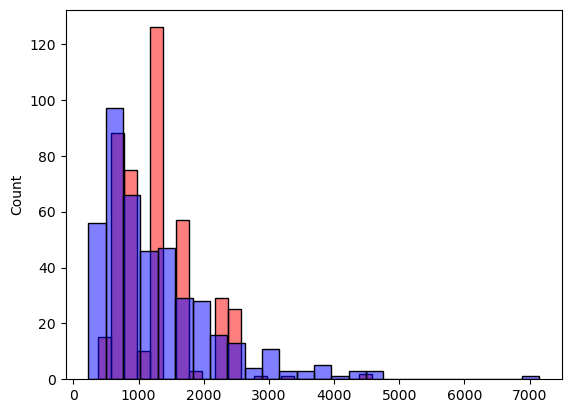

In [85]:
sns.histplot(y_pred, alpha = 0.5, color = 'red')
sns.histplot(y_val, alpha = 0.5, color = 'blue')

plt.show()

In [37]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [86]:
round(rmse(y_val, y_pred),2)

597.36

#### Fill missing values with mean

In [65]:
mean_screen = df_train['screen'].mean()

In [71]:
X_train_2 = df_train.fillna({'screen': mean_screen}).values

In [72]:
X_train_2

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [73]:
w0_2, w_2 = train_linear_regression(X_train_2, y_train)

In [74]:
w_2

array([ 43.90774584,   0.87135236, -45.18273312])

In [87]:
y_pred_2 = w0_2 + X_val.dot(w_2)

In [88]:
rmse(y_val, y_pred_2)

597.7391912416756

In [89]:
round(rmse(y_val, y_pred_2), 2)

597.74

### Question 4

In [92]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [97]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0 676.8954853003471 597.36
0.01 676.2736817204672 597.36
0.1 670.7284836313021 597.35
1 619.9030834107807 597.21
5 463.77716971415225 597.01
10 352.79713367676436 597.06
100 66.92071440180734 597.9


### Question 5

In [98]:
rmse_scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = df_train.fillna(0).values
    X_val = df_val.fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)

    rmse_scores.append(rmse(y_val, y_pred))

    
    

In [99]:
rmse_scores

[565.4520868770995,
 636.7985423056726,
 588.955869790796,
 597.8148920012515,
 571.962791511103,
 573.238325661895,
 647.3438328407194,
 550.4398184485962,
 587.3335036169963,
 576.101792943313]

In [101]:
round(np.std(rmse_scores),3)

29.176

### Question 6

In [102]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [103]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [109]:
X_full_train = df_full_train.fillna(0)
X_test =  df_test.fillna(0)

In [104]:
y_full_train = np.concatenate([y_train, y_val])

In [107]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)

In [110]:
y_pred = w0 + X_test.dot(w)

In [111]:
rmse(y_test, y_pred)

608.6099822049559